#  Linear Neural Networks for Classification





### Logistic Regression: 

It's primarily used for **binary classification**, meaning it deals with two possible outcomes (e.g., spam or not spam, positive or negative).

x_cat_test -> Cat == 0, Dog == 1. We have -> 0.007783880766046
x_dog_test -> Cat == 0, Dog == 1. We have -> 0.993852999627382
x_cat_dog -> Cat == 0, Dog == 1. We have -> 0.181607895354336


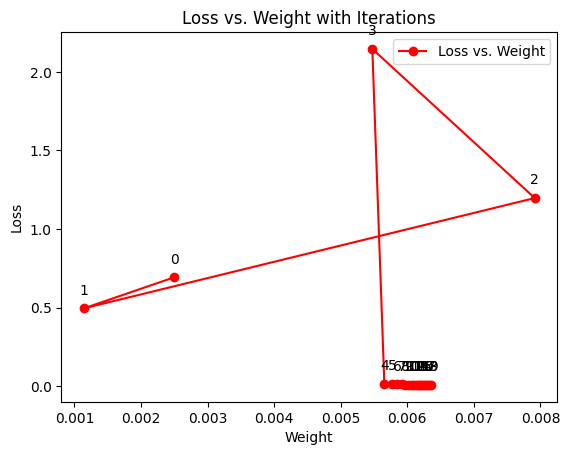

In [94]:
import numpy as np
from src.dataset_service import mock_cat_dog_img_data
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=20):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []  # To store the loss at each iteration
        self.weight_history = []  # To store the weight at each iteration


    def _sigmoid(self, z):
        """Compute the sigmoid function with overflow protection.

        Args:
            z (numpy.ndarray): The input value or array of values to the sigmoid function.

        Returns:
            numpy.ndarray: The sigmoid of the input, which is in the range (0, 1).

        The sigmoid function is an activation function that maps any real-valued number 
        into the range (0, 1), making it useful for transforming linear outputs to 
        probabilities in binary classification tasks.

        Overflow protection is implemented by clipping the input `z` to a range that 
        prevents excessively large values, which can cause numerical issues in the 
        computation of the exponential function.
        """

        # Clip the input values to avoid overflow in the exponential function
        z = np.clip(z, -50, 50)

        # Compute the sigmoid function
        return 1 / (1 + np.exp(-z))

    
    def _compute_loss(self, y, y_predicted):
        """Compute the binary cross-entropy loss for logistic regression.

        Args:
            y (numpy.ndarray): The actual target values (0 or 1) for each sample.
            y_predicted (numpy.ndarray): The predicted probabilities from the logistic regression model.

        Returns:
            float: The computed binary cross-entropy loss.

        The binary cross-entropy loss function is used in binary classification tasks.
        It quantifies how far off the predicted probabilities are from the actual class labels.
        The loss is calculated as the average of the loss for each individual sample.
        """

        m = len(y)  # Number of samples

        # Clip predicted values to avoid log(0) which is undefined
        # Clipping limits the values within a small range away from 0 and 1
        y_predicted = np.clip(y_predicted, 1e-10, 1 - 1e-10)

        # Compute the binary cross-entropy loss
        # The formula -sum(y*log(y_predicted) + (1-y)*log(1-y_predicted)) is applied to all samples
        return -1/m * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))


    def _compute_gradients(self, X, y, y_predicted):
        """Compute the gradients for weights and bias in logistic regression.

        Args:
            X (numpy.ndarray): The input features, where each row is a sample.
            y (numpy.ndarray): The actual target values (0 or 1) for each sample.
            y_predicted (numpy.ndarray): The predicted probabilities from the logistic regression model.

        Returns:
            numpy.ndarray: The gradient with respect to the weights.
            float: The gradient with respect to the bias.

        The method computes the gradient of the loss function with respect to the weights (dw) and bias (db).
        This is done using the formula for the gradient of the binary cross-entropy loss in logistic regression.
        """

        num_samples = X.shape[0]  # Total number of samples

        # Compute gradient with respect to weights
        # This is the average of the product of input features and prediction errors
        dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))

        # Compute gradient with respect to bias
        # This is the average of the prediction errors
        db = (1 / num_samples) * np.sum(y_predicted - y)

        return dw, db


    def fit(self, X, y):
        """Train the logistic regression model.

        Args:
            X (numpy.ndarray): The input features, where each row represents a sample and each column a feature.
            y (numpy.ndarray): The target values (0 or 1) corresponding to each sample in X.

        The method initializes the weights and bias to zero and then iteratively updates them over a number of iterations.
        In each iteration, it performs the following steps:
        1. Predicts the output using the current weights and bias.
        2. Calculates the loss to understand how well the model is performing.
        3. Computes the gradients for the weights and bias.
        4. Updates the weights and bias using these gradients and the learning rate.
        """

        num_features = X.shape[1]  # Number of features in the input data
        self.weights = np.zeros(num_features)  # Initialize weights as zeros
        self.bias = 0  # Initialize bias as zero

        # Iteratively update weights and bias
        for _ in range(self.num_iterations):
            # Predict current output
            y_predicted = self._sigmoid(np.dot(X, self.weights) + self.bias)

            # Calculate current loss
            loss = self._compute_loss(y, y_predicted)

            # Compute gradients for weights and bias
            dw, db = self._compute_gradients(X, y, y_predicted)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Store the loss and specific weight value for plotting
            self.loss_history.append(loss)
            self.weight_history.append(self.weights[0])  # Storing the first weight



    def predict(self, predic_x):
        """Predict probability for input data."""
        # Ensure the input is a numpy array and reshape it to (-1, number of features)
        num_features = len(self.weights)
        predic_x = np.array(predic_x).reshape(-1, num_features)
        y_predicted = self._sigmoid(np.dot(predic_x, self.weights) + self.bias)
        return y_predicted

    def plot_loss_vs_weight(self):
        """Plot the loss against a specific weight over iterations with iteration numbers."""
        plt.plot(self.weight_history, self.loss_history, marker='o', color='red', label='Loss vs. Weight')

        # Annotate each point with the iteration number
        for i in range(len(self.weight_history)):
            plt.annotate(f'{i}',  # The iteration number
                         (self.weight_history[i], self.loss_history[i]),  # The point to annotate
                         textcoords="offset points",  # How to position the text
                         xytext=(0,10),  # Distance from text to points (x,y)
                         ha='center',  # Horizontal alignment
                         fontsize=10)  # Font size

        plt.title("Loss vs. Weight with Iterations")
        plt.xlabel("Weight")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()



# Data preparation
samples = 10000
x_cat, x_dog = mock_cat_dog_img_data(samples)

#Y labelsCAT == 0
y_cat = np.zeros(len(x_cat))

#DOG == 1
y_dog = np.ones(len(x_dog))

x = np.concatenate((x_cat, x_dog))
y = np.concatenate((y_cat, y_dog))
x = x.reshape(len(x), -1)

# Shuffle data
indices = np.arange(len(y))
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

# Train the model
model = LogisticRegression( learning_rate=0.0001, num_iterations=20)
model.fit(x, y)

# TEST 

# Predict for a single instance
x_cat_test, x_dog_test = mock_cat_dog_img_data(5)
#single_cat_instance = x_cat[2].reshape(1, -1)
print("x_cat_test -> Cat == 0, Dog == 1. We have -> {:.15f}".format(model.predict(x_cat_test[2])[0]))
print("x_dog_test -> Cat == 0, Dog == 1. We have -> {:.15f}".format(model.predict(x_dog_test[2])[0]))

x_cat_dog  =  np.array([
        [[1,5, 50, 10],
        [0, 1, 200, 2],
        [0, 0, 4, 1],
        [0, 4, 3, 30]],
    ])

print("x_cat_dog -> Cat == 0, Dog == 1. We have -> {:.15f}".format(model.predict(x_cat_dog[0])[0])) 

model.plot_loss_vs_weight()






### Softmax Regression (often called Multinomial Logistic Regression) 

Extension of logistic regression to handle multi-class classification problems, where there are more than two possible discrete outcomes (e.g., classify an image as a cat, dog, or hedgehog).